In [5]:
#import packages & libraries
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests

In [6]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.fromtimestamp(d) for d in df.time]
    return df

In [7]:
df = daily_price_historical('BTC','USD')

df.head(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
0,1279324800,0.04951,0.04951,0.04951,20.00,0.9902,0.04951,direct,,2010-07-17
1,1279411200,0.08585,0.05941,0.04951,75.01,5.0920,0.08584,direct,,2010-07-18
2,1279497600,0.09307,0.07723,0.08584,574.00,49.6600,0.08080,direct,,2010-07-19
3,1279584000,0.08181,0.07426,0.08080,262.00,20.5900,0.07474,direct,,2010-07-20
4,1279670400,0.07921,0.06634,0.07474,575.00,42.2600,0.07921,direct,,2010-07-21
5,1279756800,0.08181,0.05050,0.07921,2160.00,129.7800,0.05050,direct,,2010-07-22
6,1279843200,0.06767,0.05050,0.05050,2402.50,141.0700,0.06262,direct,,2010-07-23
7,1279929600,0.06161,0.05049,0.06262,496.32,26.7300,0.05454,direct,,2010-07-24
8,1280016000,0.05941,0.05050,0.05454,1551.48,85.0600,0.05050,direct,,2010-07-25
9,1280102400,0.05600,0.05000,0.05050,877.00,46.9100,0.05600,direct,,2010-07-26


In [8]:
df.tail(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
4607,1677369600,23673.78,23068.21,23167.45,27038.81,6.314675e+08,23557.39,direct,,2023-02-26
4608,1677456000,23876.65,23144.28,23557.39,44498.06,1.044207e+09,23490.07,direct,,2023-02-27
4609,1677542400,23596.23,23039.39,23490.07,34848.42,8.140387e+08,23134.20,direct,,2023-02-28
4610,1677628800,23962.77,23037.24,23134.20,45286.75,1.069269e+09,23641.20,direct,,2023-03-01
4611,1677715200,23788.72,23212.33,23641.20,34699.93,8.128111e+08,23467.22,direct,,2023-03-02
4612,1677801600,23476.96,22147.42,23467.22,59219.77,1.327278e+09,22361.45,direct,,2023-03-03
4613,1677888000,22410.72,22179.49,22361.45,11820.44,2.639006e+08,22351.08,direct,,2023-03-04
4614,1677974400,22632.51,22240.41,22351.08,20845.84,4.677936e+08,22433.65,direct,,2023-03-05
4615,1678060800,22596.13,22304.69,22433.65,27062.82,6.069781e+08,22410.34,direct,,2023-03-06
4616,1678147200,22540.33,22358.89,22410.34,6346.67,1.424334e+08,22390.56,direct,,2023-03-07


In [9]:
limit = datetime(2020,12,31)
df_train = df[(df['timestamp'] <= limit)]

days = [val for val in df_train['timestamp'] ]
prices = [val for val in df_train['close'] ]
dict = {'Date': days, 'Close': prices}

In [10]:
df_train = pd.DataFrame(dict) 
filename = 'train_prices.csv'
df_train.to_csv(filename, index=False) 

print(f"{filename} created successfully.")

train_prices.csv created successfully.


In [11]:
#rename columns
prophet_df = df_train.rename(columns={'Date':'ds',
                                'Close':'y'})

#check
prophet_df.columns

Index(['ds', 'y'], dtype='object')

In [12]:
#initialize
model = Prophet()

#fit
model.fit(prophet_df)

11:18:08 - cmdstanpy - INFO - Chain [1] start processing
11:18:10 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
#forecast for the next 30 days
future = model.make_future_dataframe(periods=365)

#predict
forecast = model.predict(future)
     

#check out forecast
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-07-17,-87.792166,-2048.135322,1800.817167,-87.792166,-87.792166,-23.115486,-23.115486,-23.115486,-0.491049,-0.491049,-0.491049,-22.624437,-22.624437,-22.624437,0.0,0.0,0.0,-110.907652
1,2010-07-18,-87.614180,-1989.105893,1699.456647,-87.614180,-87.614180,-23.030782,-23.030782,-23.030782,-9.375283,-9.375283,-9.375283,-13.655499,-13.655499,-13.655499,0.0,0.0,0.0,-110.644961
2,2010-07-19,-87.436193,-1899.220982,1755.336732,-87.436193,-87.436193,3.337933,3.337933,3.337933,6.586757,6.586757,6.586757,-3.248824,-3.248824,-3.248824,0.0,0.0,0.0,-84.098259
3,2010-07-20,-87.258206,-1816.570301,1749.226915,-87.258206,-87.258206,10.401665,10.401665,10.401665,1.966496,1.966496,1.966496,8.435169,8.435169,8.435169,0.0,0.0,0.0,-76.856541
4,2010-07-21,-87.080219,-1831.508181,1779.638927,-87.080219,-87.080219,32.168836,32.168836,32.168836,10.959829,10.959829,10.959829,21.209007,21.209007,21.209007,0.0,0.0,0.0,-54.911383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,2021-12-27,18445.650723,16021.621986,22863.052791,15423.097451,21150.402131,1215.148495,1215.148495,1215.148495,6.586757,6.586757,6.586757,1208.561738,1208.561738,1208.561738,0.0,0.0,0.0,19660.799217
4182,2021-12-28,18458.263544,16168.079026,23061.325415,15431.313319,21171.903115,1167.122199,1167.122199,1167.122199,1.966496,1.966496,1.966496,1165.155704,1165.155704,1165.155704,0.0,0.0,0.0,19625.385743
4183,2021-12-29,18470.876365,16017.741828,22619.503524,15439.964473,21193.404099,1127.813190,1127.813190,1127.813190,10.959829,10.959829,10.959829,1116.853361,1116.853361,1116.853361,0.0,0.0,0.0,19598.689555
4184,2021-12-30,18483.489186,15991.611159,22864.280467,15449.329279,21214.905083,1067.958745,1067.958745,1067.958745,3.684006,3.684006,3.684006,1064.274740,1064.274740,1064.274740,0.0,0.0,0.0,19551.447931


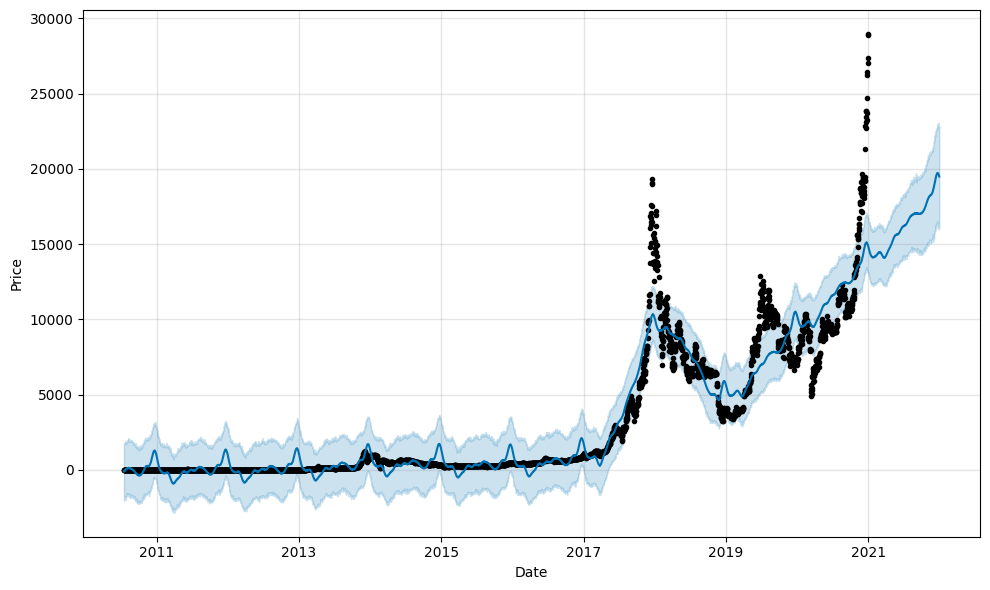

In [14]:
#visualize with Facebook internal tool
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

In [15]:
data = prophet_df[['ds','y']]
print(data)
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

             ds            y
0    2010-07-17      0.04951
1    2010-07-18      0.08584
2    2010-07-19      0.08080
3    2010-07-20      0.07474
4    2010-07-21      0.07921
...         ...          ...
3816 2020-12-27  26249.27000
3817 2020-12-28  27039.45000
3818 2020-12-29  27360.78000
3819 2020-12-30  28889.61000
3820 2020-12-31  28972.40000

[3821 rows x 2 columns]


,ds,y
0,2010-07-17,0.04951
1,2010-07-18,0.08584
2,2010-07-19,0.08080
3,2010-07-20,0.07474
4,2010-07-21,0.07921


In [16]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
neural_model = m.fit(data, freq='D', epochs=200)
future = m.make_future_dataframe(data, periods=365)
forecast = m.predict(future)
forecast.head()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (120) is too small than the required number for the learning rate finder (239). The results might not be optimal.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 120it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2021-01-01,None,12153.521484,11168.520508,1023.001526,-37.999981
1,2021-01-02,None,12149.544922,11172.810547,964.341370,12.391637
2,2021-01-03,None,12073.881836,11177.100586,903.543152,-6.761321
3,2021-01-04,None,12031.044922,11181.391602,840.933044,8.721035
4,2021-01-05,None,11981.603516,11185.681641,776.848511,19.073851


In [17]:
forecast.tail(10)

,ds,y,yhat1,trend,season_yearly,season_weekly
355,2021-12-22,None,14145.734375,12691.621094,1438.965088,15.148216
356,2021-12-23,None,14101.709961,12695.912109,1416.371460,-10.573442
357,2021-12-24,None,14051.716797,12700.203125,1389.513184,-37.999981
358,2021-12-25,None,14075.357422,12704.491211,1358.475220,12.391637
359,2021-12-26,None,14025.393555,12708.781250,1323.372559,-6.761321
360,2021-12-27,None,14006.141602,12713.072266,1284.348022,8.721035
361,2021-12-28,None,13978.010742,12717.363281,1241.572876,19.073851
362,2021-12-29,None,13932.046875,12721.653320,1195.244995,15.148216
363,2021-12-30,None,13860.958008,12725.943359,1145.587769,-10.573442
364,2021-12-31,None,13785.082031,12730.234375,1092.848389,-37.999981


In [18]:
limit = datetime(2021,12,31)
start = datetime(2021,1,1)
df_real = df[(df['timestamp'] <= limit )]
df_real = df_real[(df_real['timestamp'] >= start)]

print(df_real)

            time      high       low      open  volumefrom      volumeto  \
3821  1609459200  29666.33  28748.21  28972.40    50841.73  1.487306e+09   
3822  1609545600  33257.29  29036.26  29388.94   119214.75  3.750441e+09   
3823  1609632000  34789.34  32010.59  32203.64    93510.99  3.132759e+09   
3824  1609718400  33622.70  28493.29  33063.48   124909.68  3.901979e+09   
3825  1609804800  34487.44  29985.29  32030.55    93735.47  3.037657e+09   
...          ...       ...       ...       ...         ...           ...   
4181  1640563200  52079.46  50481.26  50790.88    21873.37  1.120188e+09   
4182  1640649600  50718.53  47317.78  50714.73    40699.40  1.985905e+09   
4183  1640736000  48145.34  46107.79  47536.39    33749.80  1.599557e+09   
4184  1640822400  47917.89  45964.28  46471.70    39311.18  1.852207e+09   
4185  1640908800  48573.22  45665.44  47129.66    34737.79  1.636014e+09   

         close conversionType conversionSymbol  timestamp  
3821  29388.94         dire

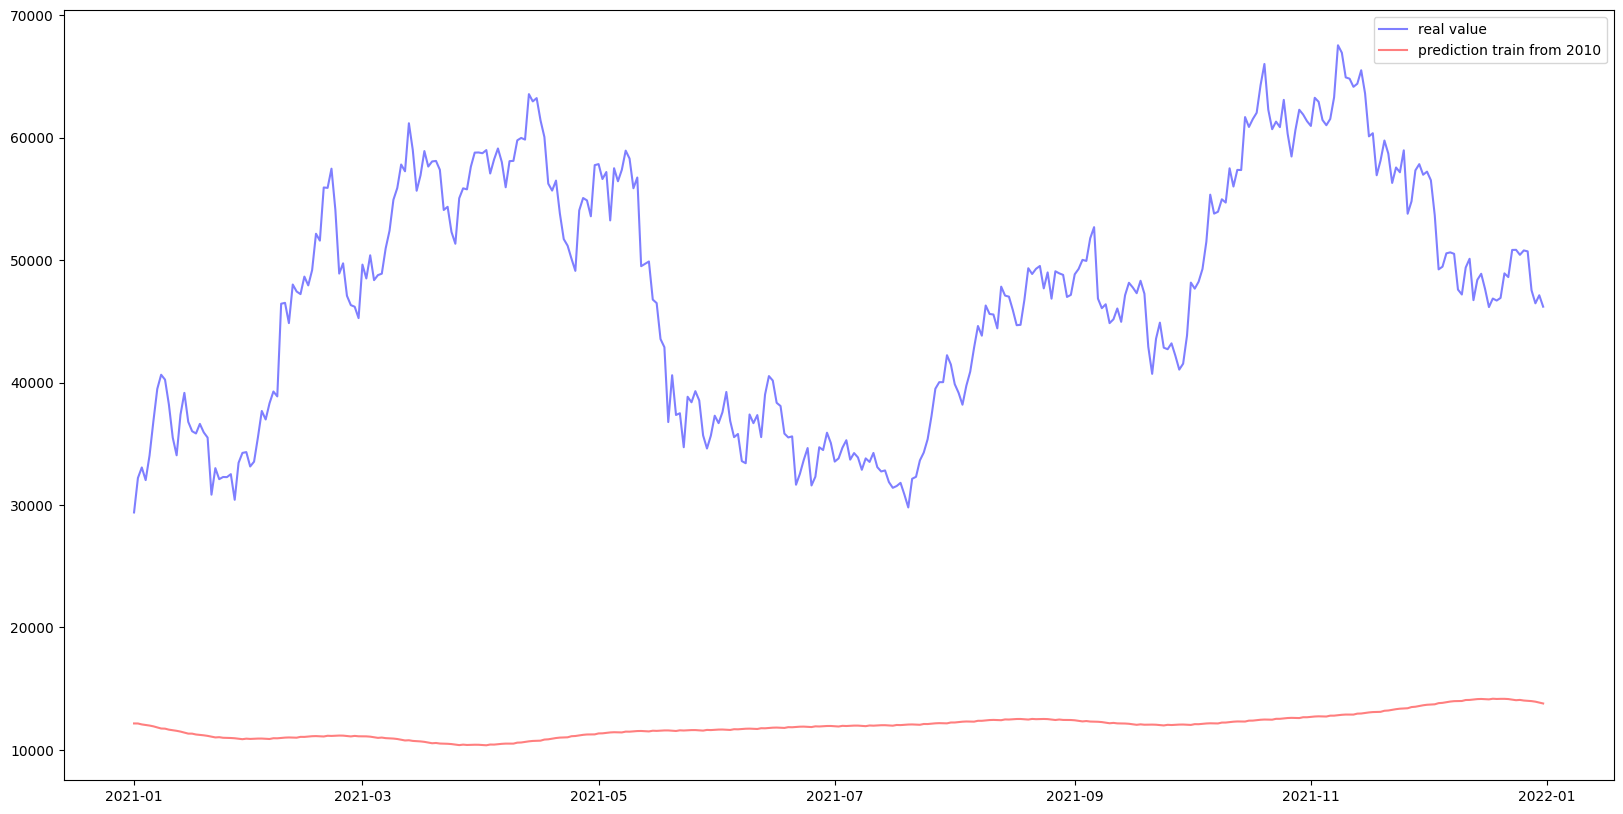

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df_real['timestamp'], df_real['close'],color='blue',alpha=0.5, label="real value")
plt.plot(forecast['ds'], forecast['yhat1'],color='red',alpha=0.5, label="prediction train from 2010")
plt.legend()
plt.show()